# Análise

- Ver quais bairros tem mais atendimentos concluídos [x]
- Ver a quantidade de chamados por época do ano [x]
- Criar graficos com matplotlib [x]

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

chamados = pd.read_csv('chamados-preprocessados.csv', sep=",", index_col=0)

/tmp/ipykernel_3599/2878490328.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  chamados = pd.read_csv('chamados-preprocessados.csv', sep=",", index_col=0)


# Quantidade de chamados por ano

<Axes: xlabel='ano', ylabel='count'>

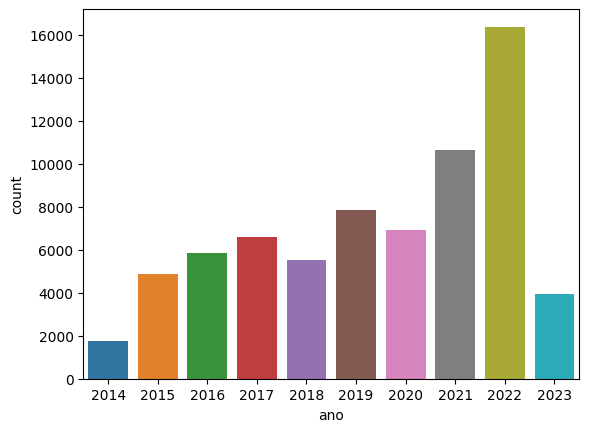

In [20]:
sns.countplot(x='ano', data=chamados)

# Quantidade de chamados por mes

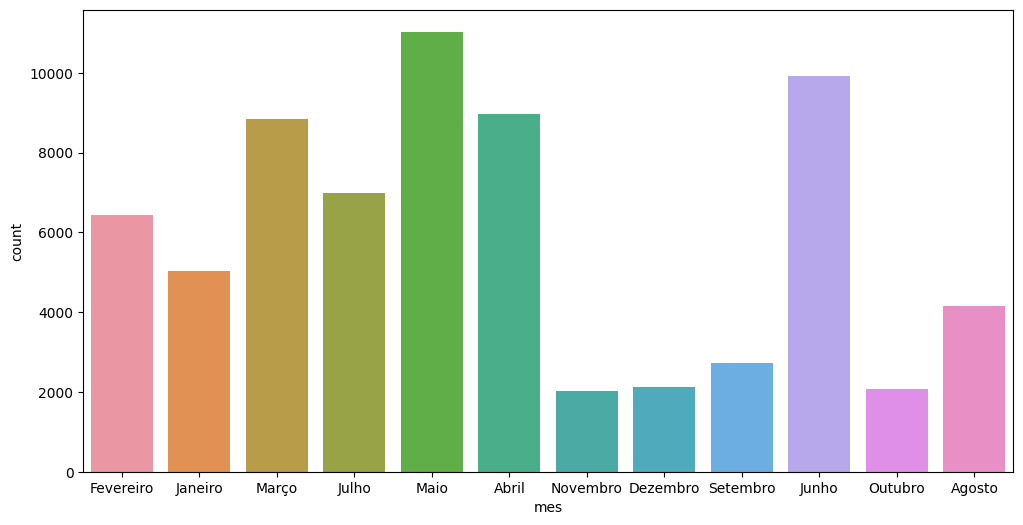

In [26]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='mes', data=chamados)
plt.show()

# Quantidade de chamados concluidos por bairro

In [127]:
# Separar os que estão concluidos
chamados_concluidos = chamados.query('processo_situacao == "completo"').groupby(['solicitacao_bairro'], as_index=False).count()

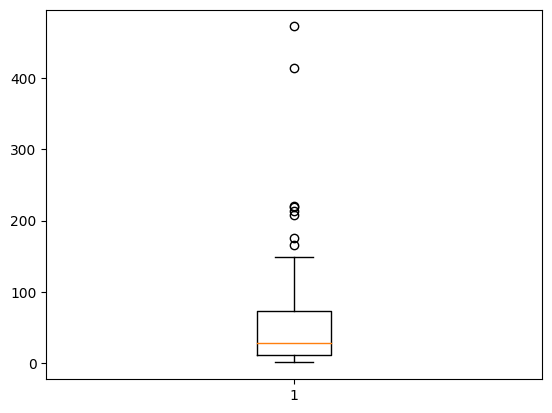

In [126]:
# Criar grafico boxplot
plt.boxplot(chamados_concluidos['solicitacao_data'])
plt.show()

### 5 bairros com mais chamados concluidos

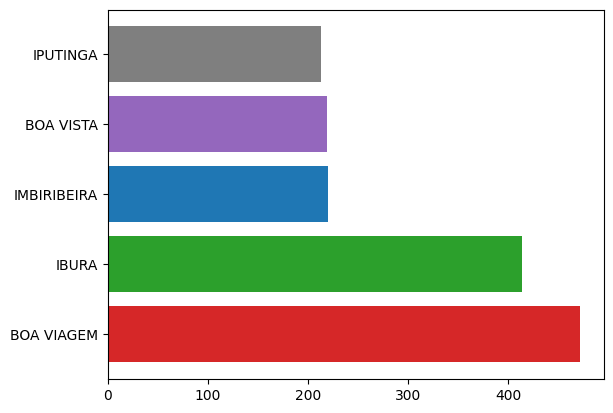

In [122]:
cores = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:grey']

# Pegar os bairros com mais chamados concluidos
bairros_mais_chamados = chamados_concluidos.sort_values(by=['solicitacao_data'], ascending=False).head(5)

# Mostrar num grafico
plt.barh(bairros_mais_chamados['solicitacao_bairro'], bairros_mais_chamados['solicitacao_data'], color=cores)
plt.show()

## 5 bairros com menos chamados concluidos

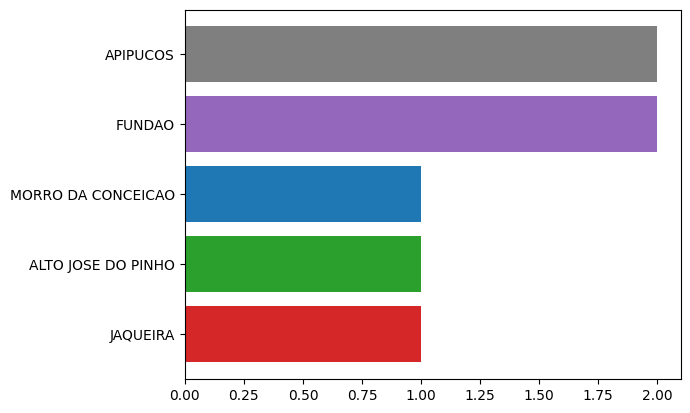

In [123]:
cores = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple', 'tab:grey']

# Pegar os bairros com meno chamados concluidos
bairros_menos_chamados = chamados_concluidos.sort_values(by=['solicitacao_data'], ascending=True).head(5)

# Criar grafico
plt.barh(bairros_menos_chamados['solicitacao_bairro'], bairros_menos_chamados['solicitacao_data'], color=cores)
plt.show()

In [22]:
chamados.head()

,solicitacao_data,solicitacao_bairro,rpa_codigo,processo_situacao,processo_tipo,processo_solicitacao,mes,ano
0,2023-02-07,AFLITOS,3,execucao,ATENDIMENTO,Vistoria,Fevereiro,2023
1,2023-01-24,AFLITOS,3,execucao,ATENDIMENTO,Vistoria,Janeiro,2023
3,2022-03-06,AFLITOS,3,execucao,ATENDIMENTO,Vistoria,Março,2022
4,2022-01-31,AFLITOS,3,execucao,ATENDIMENTO,Vistoria,Janeiro,2022
5,2021-07-05,AFLITOS,3,execucao,ATENDIMENTO,Vistoria,Julho,2021
